In [1]:
# import libraries needed
import pandas as pd  # For handling structured data (DataFrames)
import numpy as np  # For numerical calculations and handling missing values
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

C:\Users\User\AppData\Local\Temp\ipykernel_9144\2962483753.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Country'] = countryname
C:\Users\User\AppData\Local\Temp\ipykernel_9144\2962483753.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tsi_df = pd.concat([tsi_df, temp_df], ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_9144\2962483753.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

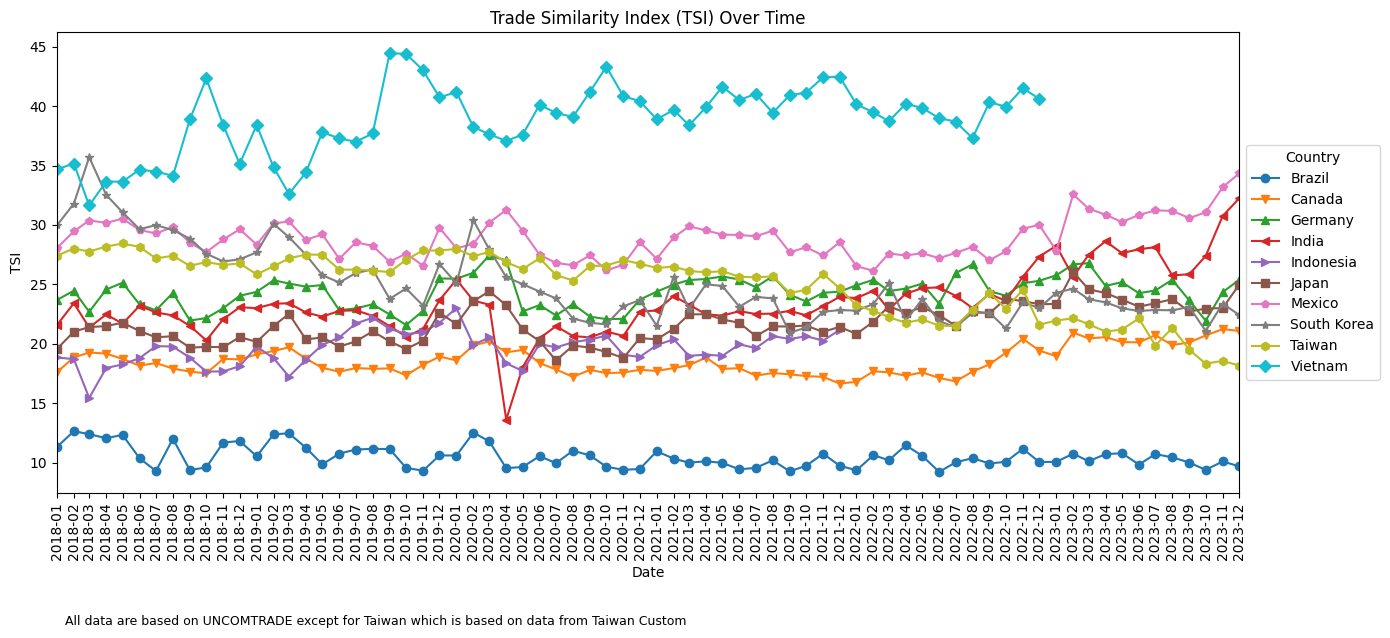

In [2]:

# Define folder path
folder_path = 'C:/Users/User/OneDrive/Documents/Chow_research/UN Comtrade/DataFor_TSI_Plot'

# Initialize master dataframe
tsi_df = pd.DataFrame(columns=['Date', 'Country', 'TSI'])

# Function to clean data
def fileprep(df):
    # Convert Date
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Date'] = df['Date'].dt.to_period('M').dt.to_timestamp()

    # Ensure TSI is float
    df['TSI'] = df['TSI'].astype(float)
    return df[['Date', 'TSI']]

#create a country map to fix country names
country_name_map = {
    'JP': 'Japan',
    'CN': 'Canada',
    'GER': 'Germany',
    'IND': 'India',
    'MEX': 'Mexico',
    'BR': 'Brazil',
    'Taiwan': 'Taiwan',
    'SouthKorea': 'South Korea',
    'Indonesia': 'Indonesia',
    'Vietnam': 'Vietnam'
}



# Loop through all files
files = glob.glob(os.path.join(folder_path, '*.xlsx'))

for filepath in files:
    filename = os.path.basename(filepath)

    # Extract country abbreviation
    country_abbrev = filename.split('_TSI')[0]

    # Map to full name (fallback to abbreviation if not found)
    countryname = country_name_map.get(country_abbrev, country_abbrev)

    # Read the Excel file
    df = pd.read_excel(filepath)

    # Clean and prepare data
    temp_df = fileprep(df)

    # Add country name
    temp_df['Country'] = countryname

    # Append to master df
    tsi_df = pd.concat([tsi_df, temp_df], ignore_index=True)

# After reading & concatenating all data:
tsi_df = pd.concat([tsi_df, temp_df], ignore_index=True)


# Filter to desired time range
start_date = pd.to_datetime('2018-01-01')
end_date = pd.to_datetime('2023-12-01')
tsi_df = tsi_df[(tsi_df['Date'] >= start_date) & (tsi_df['Date'] <= end_date)]


# Pivot table for plotting
df_pivot = tsi_df.pivot_table(index='Date', columns='Country', values='TSI')

# Plotting


# Define unique markers for each country
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'D', 'x', '+']

plt.figure(figsize=(14, 6))

# Plot each country with its own marker
for i, country in enumerate(df_pivot.columns):
    plt.plot(df_pivot.index, df_pivot[country], label=country, marker=markers[i % len(markers)])

# Title and labels
plt.title('Trade Similarity Index (TSI) Over Time')
plt.xlabel('Date')
plt.ylabel('TSI')

# Set x-axis ticks for every month
plt.xticks(pd.date_range(start_date, end_date, freq='MS'), rotation=90)
plt.xlim([start_date, end_date])


# Format x-axis nicely
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Legend to the left
plt.legend(title='Country', loc='center left', bbox_to_anchor=(1, 0.5))

# Add data source text at the bottom left
plt.figtext(0.05, -0.05, 'All data are based on UNCOMTRADE except for Taiwan which is based on data from Taiwan Custom', ha='left', fontsize=9)


plt.tight_layout()
plt.show()

In [3]:
df_pivot.tail()

Country,Brazil,Canada,Germany,India,Indonesia,Japan,Mexico,South Korea,Taiwan,Vietnam
Date,,,,,,,,,,
2023-08-01,10.457928,19.901181,25.391386,25.757640,NaN,23.767513,31.187192,22.819924,21.341131,NaN
2023-09-01,10.019338,20.126485,23.658336,25.857578,NaN,22.723682,30.582932,23.111255,19.514442,NaN
2023-10-01,9.402798,20.705043,21.955379,27.390250,NaN,22.968663,31.065850,21.083173,18.332622,NaN
2023-11-01,10.111087,21.242696,24.351927,30.749823,NaN,23.012197,33.174694,23.387259,18.571644,NaN
2023-12-01,9.706823,21.092774,25.374497,32.230680,NaN,24.957996,34.331449,22.437853,18.177307,NaN
